# banking Finanace

In [1]:
# The customer will buy or not a FD or some investment plan?

In [2]:
# InDependent variables:

# age : age of the client 
# job : type of the job 
# marital : marital status
# education : level of education 
# default : loan defaulter or not
# balance : bank balance in dollers
# housing : client have the house loan or not
# loan : client have the personal loan or not 
# contact : type of the contact of the client  
# day : last contact day of the client 
# month : last contact month of the client 
# duration : call duartion with the client(in sec's)
# campaign : no of times contacted with client in the entire campaign 
# pdays : no of days before client contacted 
# previous : no of times contacted with client in the before the campaign
# poutcome : outcome of the previous marketing campaign

# ------------------------------------------------------------------------------------------------------
# dependent variable:

# Target : product subscribed or not 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('Banking_finance.csv')

In [5]:
df=data.copy()

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
columns_list=df.columns
print(columns_list)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


In [8]:
# unique values in different columns
for column in columns_list:
    print(f'{column}:{df[column].unique()}')

age:[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:['married' 'single' 'divorced']
education:['tertiary' 'secondary' 'unknown' 'primary']
default:['no' 'yes']
balance:[ 2143    29     2 ...  8205 14204 16353]
housing:['yes' 'no']
loan:['no' 'yes']
contact:['unknown' 'cellular' 'telephone']
day:[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration:[ 261  151   76 ... 1298 1246 1556]
campaign:[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
# replace unknown to NaN
df=df.replace("unknown",np.nan)
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# find % of missing value

In [13]:
df.isnull().sum()/len(df)*100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64

In [14]:
# we can drop contact and poutcome 
df1=df.drop(["contact","poutcome"],axis=1)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [16]:
df1.isnull().sum()/len(df1)*100

age          0.000000
job          0.637013
marital      0.000000
education    4.107407
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
Target       0.000000
dtype: float64

In [17]:
df1["job"]=df1["job"].fillna(df1["job"].mode()[0])
df1["education"]=df1["education"].fillna(df1["education"].mode()[0])

In [18]:
df1.isnull().sum()/len(df1)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
Target       0.0
dtype: float64

In [19]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
# please draw boxplot, histogram for visualization
#we are not handling outliers because we dont know about the banking domain

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [20]:
columns_list1=df1.columns
print(columns_list1)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target'],
      dtype='object')


In [23]:
# unique values in different columns
for column in columns_list1:
    print(f'{column}:{df1[column].unique()}')

age:[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job:['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital:['married' 'single' 'divorced']
education:['tertiary' 'secondary' 'primary']
default:['no' 'yes']
balance:[ 2143    29     2 ...  8205 14204 16353]
housing:['yes' 'no']
loan:['no' 'yes']
day:[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration:[ 261  151   76 ... 1298 1246 1556]
campaign:[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays:[ -1 151 166  91  86 143 147  89 14

In [24]:
# how to use the one hot encoding

In [25]:
df10=df1.copy()

In [26]:
df10.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no


In [27]:
df10=pd.get_dummies(df10,columns=['job','marital', 'education', 'default','housing','loan','month'],drop_first= True)

In [28]:
df10.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,no,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,no,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,no,1,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
corr_matrix1=df10.corr(method="spearman")
corr_matrix1

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,1.000000,0.096380,-0.008948,-0.033257,0.037136,-0.017468,-0.011900,-0.013099,0.031818,0.088363,...,0.007014,-0.012416,-0.015814,0.006387,0.068895,-0.000035,-0.116237,0.042032,0.032397,0.006820
balance,0.096380,1.000000,0.001329,0.042651,-0.030959,0.069676,0.079536,-0.042146,-0.010665,-0.000794,...,0.028704,0.016110,-0.005056,-0.111392,0.051993,0.043837,-0.097078,0.121513,0.051111,0.041836
day,-0.008948,0.001329,1.000000,-0.058142,0.139581,-0.092226,-0.087780,-0.024602,-0.000565,0.004333,...,-0.011442,-0.288243,0.235143,0.147293,-0.192080,-0.022652,-0.033364,0.119054,0.031364,-0.053187
duration,-0.033257,0.042651,-0.058142,1.000000,-0.107962,0.028698,0.031175,0.011564,-0.001155,-0.016313,...,0.027946,-0.013913,0.014674,0.005028,-0.041011,0.005134,0.029601,-0.020105,0.019592,0.025238
campaign,0.037136,-0.030959,0.139581,-0.107962,1.000000,-0.112284,-0.108448,0.013892,0.005705,0.014631,...,-0.010355,-0.026173,-0.079257,0.094335,0.021720,-0.022862,-0.056148,-0.099955,-0.074330,-0.050168
pdays,-0.017468,0.069676,-0.092226,0.028698,-0.112284,1.000000,0.985645,-0.014916,-0.014792,-0.028042,...,0.064486,0.103146,0.075733,-0.158848,-0.118779,0.045065,0.020829,0.069158,0.085089,0.099373
previous,-0.011900,0.079536,-0.087780,0.031175,-0.108448,0.985645,1.000000,-0.026170,-0.014646,-0.025866,...,0.065121,0.106221,0.078683,-0.158416,-0.115091,0.049140,0.000148,0.084851,0.094612,0.108068
job_blue-collar,-0.013099,-0.042146,-0.024602,0.011564,0.013892,-0.014916,-0.026170,1.000000,-0.098404,-0.089608,...,-0.026712,-0.038794,-0.034071,-0.014979,0.030736,-0.041028,0.157159,-0.049649,-0.039320,-0.041831
job_entrepreneur,0.031818,-0.010665,-0.000565,-0.001155,0.005705,-0.014792,-0.014646,-0.098404,1.000000,-0.030969,...,-0.007297,-0.000067,-0.005825,0.025949,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769
job_housemaid,0.088363,-0.000794,0.004333,-0.016313,0.014631,-0.028042,-0.025866,-0.089608,-0.030969,1.000000,...,0.000258,-0.012486,-0.005061,0.034992,0.052663,-0.000110,-0.066673,-0.013343,0.006155,-0.002265


<AxesSubplot:>

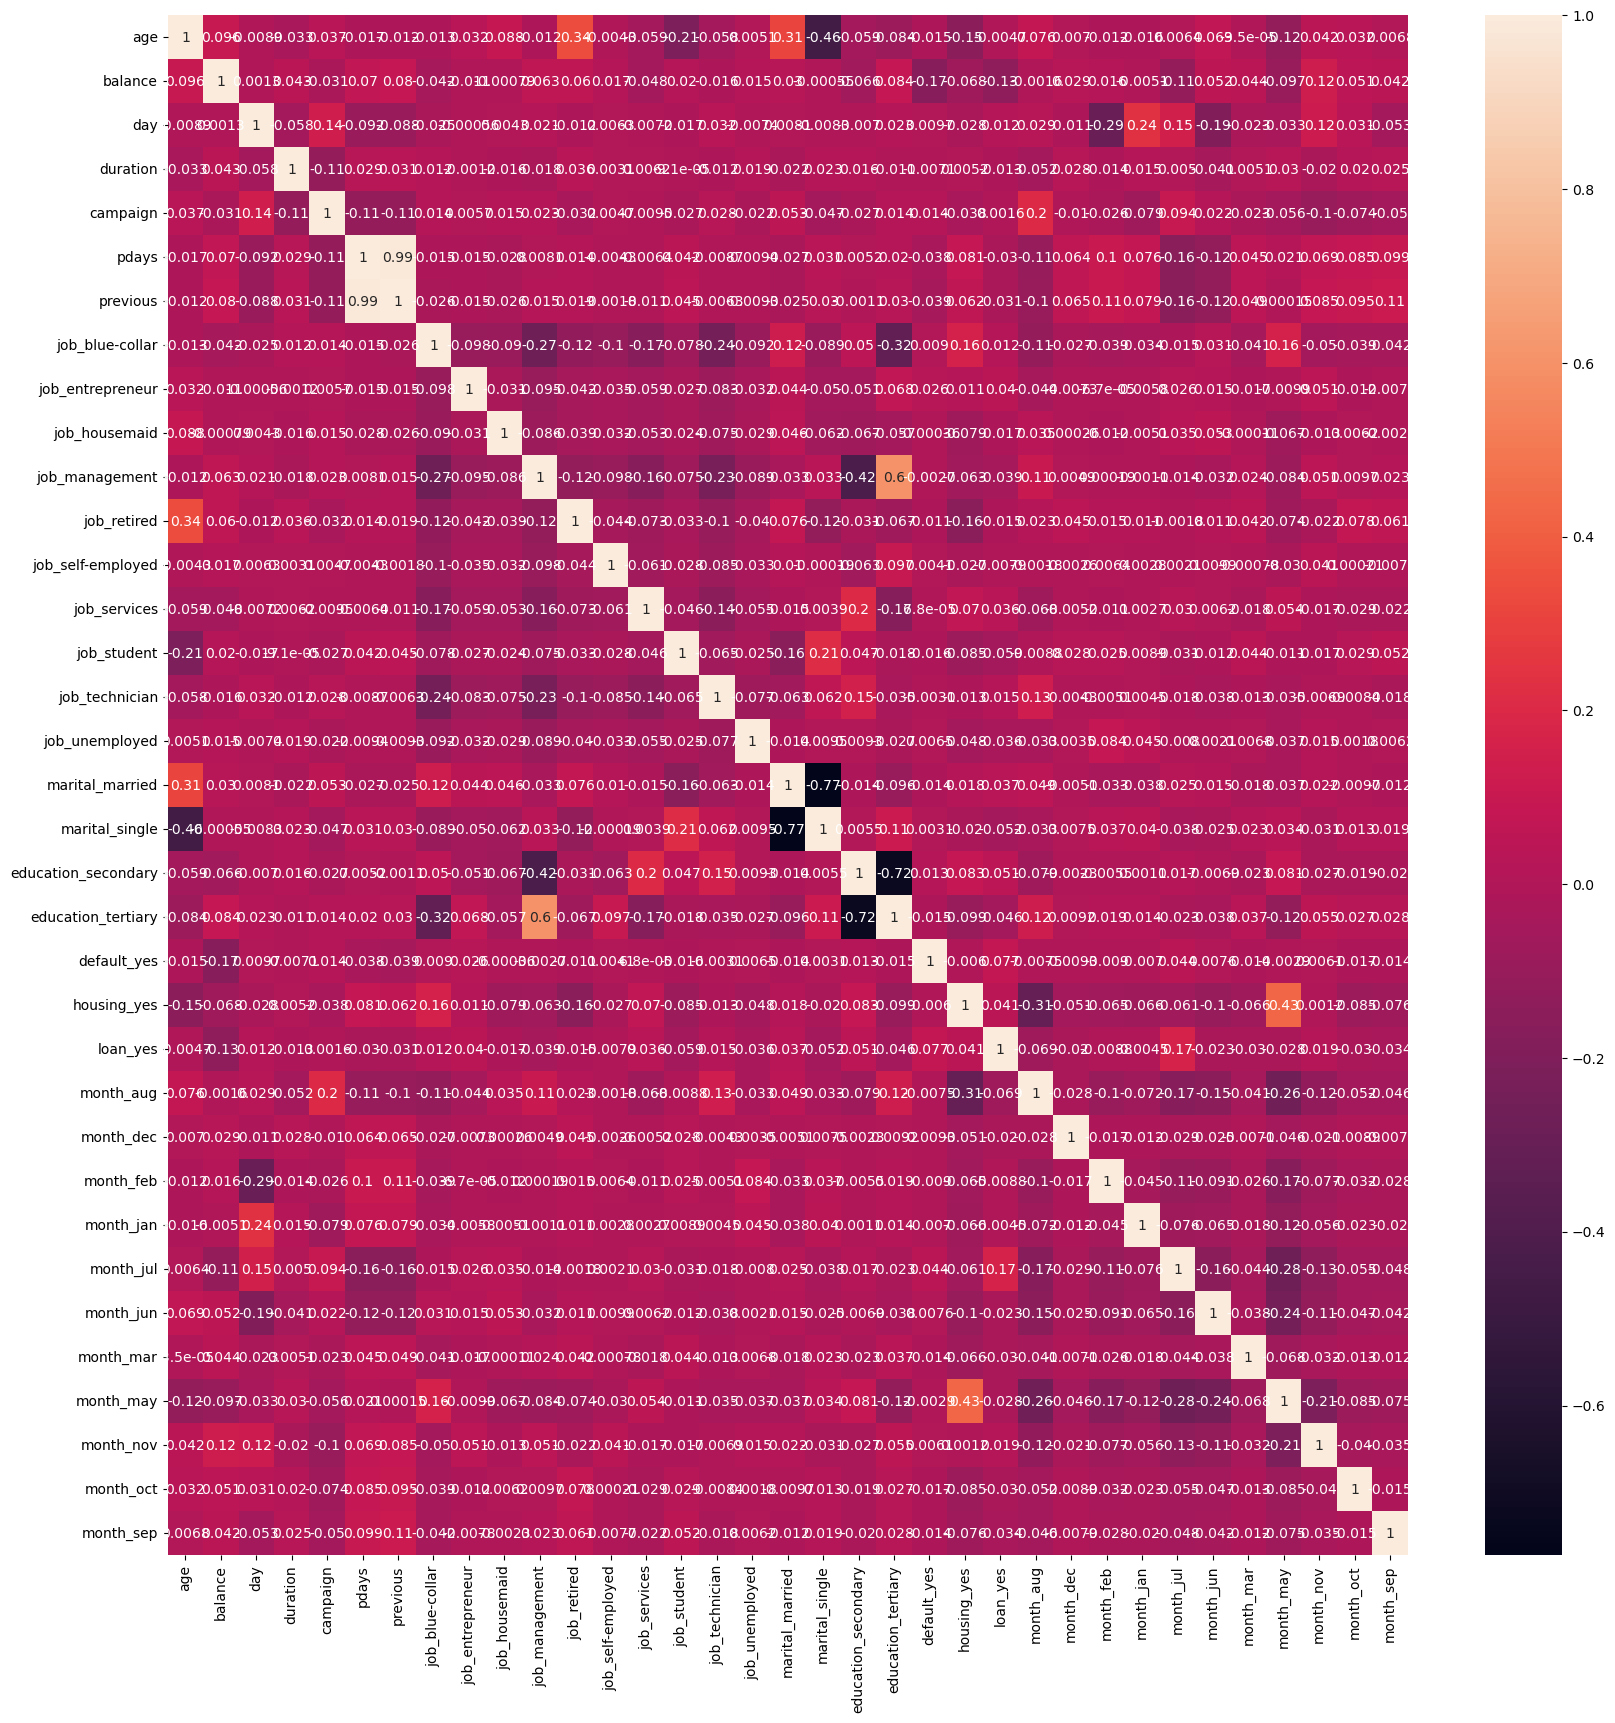

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix1,annot=True)

In [30]:
# creation of upper triangle
upper=corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape),k=1).astype(np.bool))


In [31]:
upper

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,NaN,0.09638,-0.008948,-0.033257,0.037136,-0.017468,-0.011900,-0.013099,0.031818,0.088363,...,0.007014,-0.012416,-0.015814,0.006387,0.068895,-0.000035,-0.116237,0.042032,0.032397,0.006820
balance,NaN,NaN,0.001329,0.042651,-0.030959,0.069676,0.079536,-0.042146,-0.010665,-0.000794,...,0.028704,0.016110,-0.005056,-0.111392,0.051993,0.043837,-0.097078,0.121513,0.051111,0.041836
day,NaN,NaN,NaN,-0.058142,0.139581,-0.092226,-0.087780,-0.024602,-0.000565,0.004333,...,-0.011442,-0.288243,0.235143,0.147293,-0.192080,-0.022652,-0.033364,0.119054,0.031364,-0.053187
duration,NaN,NaN,NaN,NaN,-0.107962,0.028698,0.031175,0.011564,-0.001155,-0.016313,...,0.027946,-0.013913,0.014674,0.005028,-0.041011,0.005134,0.029601,-0.020105,0.019592,0.025238
campaign,NaN,NaN,NaN,NaN,NaN,-0.112284,-0.108448,0.013892,0.005705,0.014631,...,-0.010355,-0.026173,-0.079257,0.094335,0.021720,-0.022862,-0.056148,-0.099955,-0.074330,-0.050168
pdays,NaN,NaN,NaN,NaN,NaN,NaN,0.985645,-0.014916,-0.014792,-0.028042,...,0.064486,0.103146,0.075733,-0.158848,-0.118779,0.045065,0.020829,0.069158,0.085089,0.099373
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026170,-0.014646,-0.025866,...,0.065121,0.106221,0.078683,-0.158416,-0.115091,0.049140,0.000148,0.084851,0.094612,0.108068
job_blue-collar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.098404,-0.089608,...,-0.026712,-0.038794,-0.034071,-0.014979,0.030736,-0.041028,0.157159,-0.049649,-0.039320,-0.041831
job_entrepreneur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030969,...,-0.007297,-0.000067,-0.005825,0.025949,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769
job_housemaid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000258,-0.012486,-0.005061,0.034992,0.052663,-0.000110,-0.066673,-0.013343,0.006155,-0.002265


<AxesSubplot:>

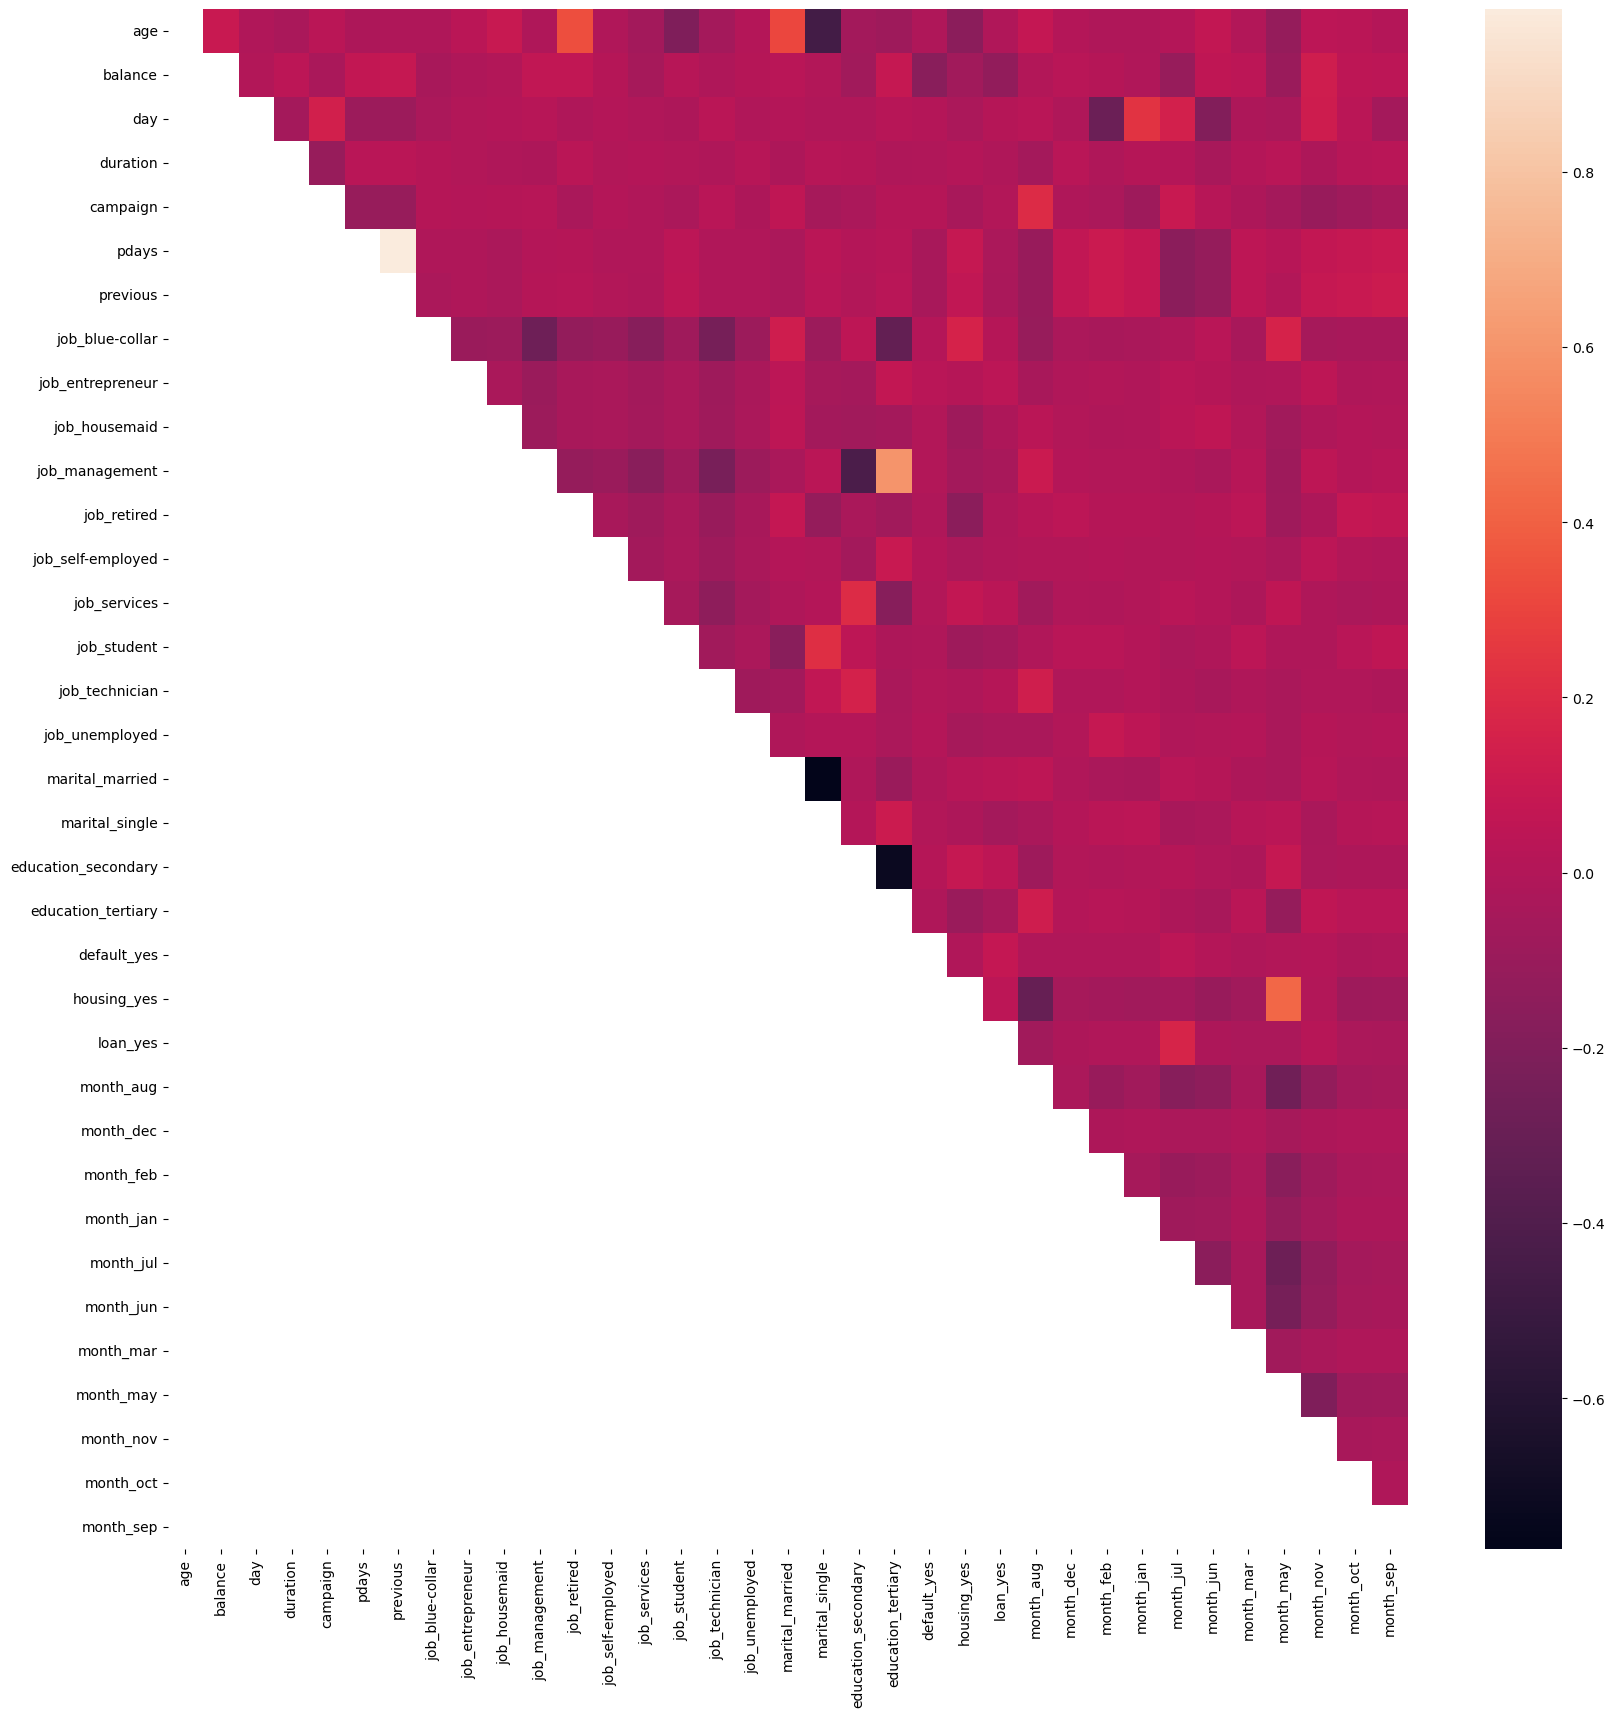

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(upper)

In [33]:
positive_high_corr=[column for column in upper.columns if any(upper[column]>=0.8)]
negative_high_corr=[column for column in upper.columns if any(upper[column]<=-0.8)]
print("high positive corr\n", positive_high_corr )
print("high negative corr\n", negative_high_corr )

high positive corr
 ['previous']
high negative corr
 []


In [34]:
all_drop=positive_high_corr+negative_high_corr
all_drop

['previous']

In [35]:
df10.shape

(45211, 36)

In [36]:
df11=df10.drop(all_drop,axis=1)

In [37]:
df11.shape

(45211, 35)

In [38]:
df11.isnull().sum().sum()

0

In [39]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   day                  45211 non-null  int64 
 3   duration             45211 non-null  int64 
 4   campaign             45211 non-null  int64 
 5   pdays                45211 non-null  int64 
 6   Target               45211 non-null  object
 7   job_blue-collar      45211 non-null  uint8 
 8   job_entrepreneur     45211 non-null  uint8 
 9   job_housemaid        45211 non-null  uint8 
 10  job_management       45211 non-null  uint8 
 11  job_retired          45211 non-null  uint8 
 12  job_self-employed    45211 non-null  uint8 
 13  job_services         45211 non-null  uint8 
 14  job_student          45211 non-null  uint8 
 15  job_technician       45211 non-null  uint8 
 16  job_

In [40]:
df11["Target"]=df11["Target"].map({"no":0,"yes":1})

In [41]:
df11["Target"].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Target, dtype: float64

# preprocessing complete

In [42]:
#model building process

In [49]:
X=df11.drop(['Target'],axis=1)
Y=df11['Target']

In [50]:
# scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scale=MinMaxScaler()

In [53]:
X_scaled=scale.fit_transform(X)# return in array format

In [54]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [57]:
df['Target'].value_counts()# imbalanced target variable

no     39922
yes     5289
Name: Target, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)



In [59]:
X.shape

(45211, 34)

In [60]:
X_train.shape

(36168, 34)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [65]:
LR=LogisticRegression()
KNN=KNeighborsClassifier()
support=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,classification_report


In [69]:

for model in[LR,KNN,support,gnb,dt,rf,bg]:
    print("=========="*6)
    print("performance of", model)
    print("=========="*6)
    abc=model.fit(X_train,Y_train)
    y_pred_train=abc.predict(X_train)
    y_pred_test=abc.predict(X_test)
    AS_train=accuracy_score(Y_train,y_pred_train)
    AS_test=accuracy_score(Y_test,y_pred_test)
    cm=confusion_matrix(Y_test,y_pred_test)
    CR=classification_report(Y_test,y_pred_test)
    #ROC=roc_auc_score(Y_test1,y_pred)# its a probability method
    
    # printing the metrics
    
    print("training Accuracy score \n" ,AS_train)
    print("=========="*3)
    print("testing Accuracy score \n" ,AS_test)
    print("=========="*3)
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,CR)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)
    

performance of LogisticRegression()
training Accuracy score 
 0.8929993364299934
testing Accuracy score 
 0.8943934534999447
Confusion matrix 
 [[7849  136]
 [ 819  239]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.64      0.23      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.77      0.60      0.64      9043
weighted avg       0.87      0.89      0.87      9043

performance of KNeighborsClassifier()
training Accuracy score 
 0.9066025215660252
testing Accuracy score 
 0.8802388587858012
Confusion matrix 
 [[7762  223]
 [ 860  198]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      7985
           1       0.47      0.19      0.27      1058

    accuracy                           0.88      9043
   macro avg       0.69      0.58      0.60      9043
weighted 

In [80]:
# balancing the dataset approach

In [ ]:
# 1 oversampling
# 2 undersampling

In [ ]:
# oversampling--take majority class as usual--increase the minority class
# undersampling--take the minority class as usual --reduce the majority class



In [70]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [71]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,BorderlineSMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler,NearMiss



In [73]:
over=RandomOverSampler()
under=RandomUnderSampler()
sm=SMOTE()

In [74]:
X_train.shape

(36168, 34)

In [75]:
Y_train.value_counts()

0    31937
1     4231
Name: Target, dtype: int64

In [76]:
#oversampling approach
X_train_over,Y_train_over=over.fit_resample(X_train,Y_train)

In [77]:
X_train_over.shape

(63874, 34)

In [78]:
Y_train_over.value_counts()

0    31937
1    31937
Name: Target, dtype: int64

In [79]:
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)

In [80]:
Y_train_under.value_counts()

0    4231
1    4231
Name: Target, dtype: int64

In [81]:
X_train_under.shape

(8462, 34)

In [115]:
#after data balancing we have new balanced training data x_train y_train

In [82]:
X_train_smote,Y_train_smote=sm.fit_resample(X_train,Y_train)

In [ ]:
#random forest model...applying oversampling dataset in model

In [83]:
rf.fit(X_train_over,Y_train_over)

RandomForestClassifier()

In [84]:
Y_pred_over_RF=rf.predict(X_test)

In [85]:
print(classification_report(Y_test,Y_pred_over_RF))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.61      0.49      0.54      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.72      0.74      9043
weighted avg       0.90      0.90      0.90      9043



In [86]:
#SMOTE method---Creating a synthetic dataset based on KNN principles.

In [88]:
rf.fit(X_train_smote,Y_train_smote)

RandomForestClassifier()

In [94]:
Y_pred_smote_RF=rf.predict(X_test)

In [95]:
print(classification_report(Y_test,Y_pred_smote_RF))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7985
           1       0.52      0.62      0.57      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.77      0.75      9043
weighted avg       0.90      0.89      0.89      9043



In [96]:
# undersampling approach

In [98]:
rf.fit(X_train_under,Y_train_under)

RandomForestClassifier()

In [99]:
Y_pred_under_RF=rf.predict(X_test)

In [101]:
print(classification_report(Y_test,Y_pred_under_RF))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7985
           1       0.39      0.87      0.54      1058

    accuracy                           0.83      9043
   macro avg       0.69      0.85      0.72      9043
weighted avg       0.91      0.83      0.85      9043



In [ ]:
# saving data to csv
#df11.to_csv('new_df11.csv',index=False)